### DIABETES PREDICTION SYSTEM

### Introduction 

Diabetes is a chronic metabolic disorder that poses a significant health challenge globally. Being able to make early and accurate diagnosis is pivotal for effective management and prevention of complications.

In this project, our main aim is  to develop a robust predictive model for diagnosing diabetes based on a variety of diagnostic measurements.

### About data set

The data set is  originally  from the National Institute of Diabetes and Digestive and Kidney Diseases and has been curated with some specific constraints. 

All subjects in the data set are female, at least 21 years old, and belong to the Pima Indian heritage. This targeted selection ensures a focused exploration of diabetes prediction within a specific demographic, enhancing the model's applicability to a well-defined population.


### Import required libraries


In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

**Pandas** : Simplifies data analysis and manipulation with Data Frames and Series.

**NumPy** : Powerful for numerical computing, handling large arrays, and offering high-level math functions.

**Matplotlib** : Your go-to for creating diverse plots like lines, scatter plots, bars, and histograms.

**Seaborn** :Enhances Matplotlib for stylish and informative statistical data visualization.



### Import libraries for prediction 

In [8]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Sklearn**: Short for Scikit-learn, a  Python machine learning library offering tools for data analysis and model development.

**Train Test Split**: A technique to divide data into training and testing sets, crucial for evaluating model performance.

**Logistic Regression**: A method utilizing the logistic function to predict the probability of a binary outcome.

**Accuracy**: A metric gauging the percentage of correctly classified instances in a classification model.


### Load data set 

In [11]:
df = pd.read_csv ("diabetes_prediction/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Check for null values 

In [13]:
null_values = df.isnull().sum()
null_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Correlation 

In [15]:
correlation= df.corr ()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


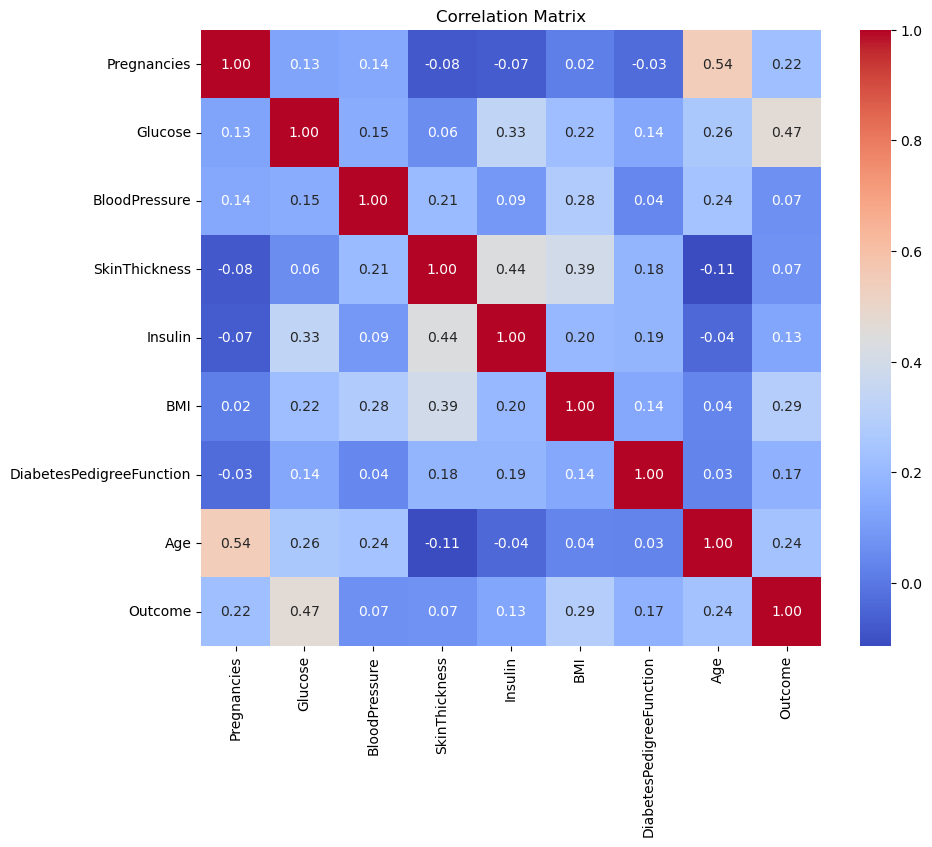

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Train the model

Split the data into train and test 

In [18]:
x = df.drop("Outcome", axis=1)
y = df["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 60)

x stores all the independent variables

y stores the dependent variable (what we are trying to predict )

Train-test splits the data into two parts: 20% for testing and 80% for training, helping us see how accurate our predictions are.

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression ()
model.fit (x_train, y_train)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
prediction = model.predict(x_test)
print (prediction)

[1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0
 0 1 0 0 1 0]


In [36]:
accuracy = accuracy_score (prediction, y_test)
accuracy

0.7792207792207793